In [21]:
#libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [22]:
#functions
def extract_year_mon_day(df):
    """
    Takes in a dataframe and splits up a date in to day, month, year 
    in their own respective columns
    """
    df['Year'], df['Month'], df['Day'] = df['date'].dt.year, df['date'].dt.month, df['date'].dt.day
    return df

def Lin_Reg_Model(LinReg_Var,X_train, Y_train, X_test, Y_test):
    """
    Function for Checking for Linear Regression
    Plots a scatter plot of Predicted and Test Data
    Prints the explained Variance Score
    """
    mod = LinReg_Var.fit(X_train, Y_train)
    y_pred = mod.predict(X_test)
    plt.scatter(y_pred,Y_test)
    plt.show()
    print("explained variance score: ", explained_variance_score(Y_test,y_pred))

def Lin_Reg_Model_Log(LinReg_Var,X_train, Y_train, X_test, Y_test):
    
    mod = LinReg_Var.fit(X_train, np.log(Y_train))
    y_pred = mod.predict(X_test)
    plt.scatter(y_pred, np.log(Y_test))
    plt.show()
    print("explained variance score: ", explained_variance_score(Y_test,np.e**y_pred))

In [23]:
kc_houses = pd.read_csv('/Users/flatironschool/Documents/dsc-v2-mod1-final-project-houston-ds-060319/kc_house_data.csv')

In [24]:
kc_houses['was_renovated']= kc_houses['yr_renovated'].fillna(0)
temp = kc_houses['was_renovated'].astype(bool).astype(int)
kc_houses['was_renovated'] = temp
kc_houses.drop(columns = ['yr_renovated'],inplace =True)

In [25]:
kc_houses['waterfront'].fillna(0,inplace=True)

In [26]:
no_view = kc_houses['view'].isna()
kc_houses.drop(kc_houses[no_view].index,inplace=True)

In [27]:
no_basement = kc_houses['sqft_basement']=='?'
kc_houses = kc_houses.drop(kc_houses[no_basement].index)

In [28]:
kc_houses['sqft_basement'] = kc_houses['sqft_basement'].apply(lambda x: float(x))

In [29]:
too_many_bedrooms = kc_houses[kc_houses['bedrooms']>15]
kc_houses.drop(too_many_bedrooms.index,inplace =True)
kc_houses.drop(kc_houses[kc_houses['price']>5000000].index,inplace=True)

In [30]:
kc_houses['log_sqft_liv'] = np.log(kc_houses['sqft_living'])

In [31]:
zips = pd.get_dummies(kc_houses['zipcode'])

In [39]:
zips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21075 entries, 0 to 21596
Data columns (total 70 columns):
98001    21075 non-null uint8
98002    21075 non-null uint8
98003    21075 non-null uint8
98004    21075 non-null uint8
98005    21075 non-null uint8
98006    21075 non-null uint8
98007    21075 non-null uint8
98008    21075 non-null uint8
98010    21075 non-null uint8
98011    21075 non-null uint8
98014    21075 non-null uint8
98019    21075 non-null uint8
98022    21075 non-null uint8
98023    21075 non-null uint8
98024    21075 non-null uint8
98027    21075 non-null uint8
98028    21075 non-null uint8
98029    21075 non-null uint8
98030    21075 non-null uint8
98031    21075 non-null uint8
98032    21075 non-null uint8
98033    21075 non-null uint8
98034    21075 non-null uint8
98038    21075 non-null uint8
98039    21075 non-null uint8
98040    21075 non-null uint8
98042    21075 non-null uint8
98045    21075 non-null uint8
98052    21075 non-null uint8
98053    21075 non-nu

In [49]:
zips.reset_index(drop = True)
# zips.drop(columns = ['index'],inplace =True)
zips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21075 entries, 0 to 21596
Data columns (total 70 columns):
98001    21075 non-null uint8
98002    21075 non-null uint8
98003    21075 non-null uint8
98004    21075 non-null uint8
98005    21075 non-null uint8
98006    21075 non-null uint8
98007    21075 non-null uint8
98008    21075 non-null uint8
98010    21075 non-null uint8
98011    21075 non-null uint8
98014    21075 non-null uint8
98019    21075 non-null uint8
98022    21075 non-null uint8
98023    21075 non-null uint8
98024    21075 non-null uint8
98027    21075 non-null uint8
98028    21075 non-null uint8
98029    21075 non-null uint8
98030    21075 non-null uint8
98031    21075 non-null uint8
98032    21075 non-null uint8
98033    21075 non-null uint8
98034    21075 non-null uint8
98038    21075 non-null uint8
98039    21075 non-null uint8
98040    21075 non-null uint8
98042    21075 non-null uint8
98045    21075 non-null uint8
98052    21075 non-null uint8
98053    21075 non-nu

In [53]:
zips = zips.as_matrix()
zips = pd.DataFrame(zips)
zips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21075 entries, 0 to 21074
Data columns (total 70 columns):
0     21075 non-null uint8
1     21075 non-null uint8
2     21075 non-null uint8
3     21075 non-null uint8
4     21075 non-null uint8
5     21075 non-null uint8
6     21075 non-null uint8
7     21075 non-null uint8
8     21075 non-null uint8
9     21075 non-null uint8
10    21075 non-null uint8
11    21075 non-null uint8
12    21075 non-null uint8
13    21075 non-null uint8
14    21075 non-null uint8
15    21075 non-null uint8
16    21075 non-null uint8
17    21075 non-null uint8
18    21075 non-null uint8
19    21075 non-null uint8
20    21075 non-null uint8
21    21075 non-null uint8
22    21075 non-null uint8
23    21075 non-null uint8
24    21075 non-null uint8
25    21075 non-null uint8
26    21075 non-null uint8
27    21075 non-null uint8
28    21075 non-null uint8
29    21075 non-null uint8
30    21075 non-null uint8
31    21075 non-null uint8
32    21075 non-null uint8


/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [51]:
from sklearn import preprocessing as pp
scaler = MinMaxScaler()
features = kc_houses[['view','lat','log_sqft_liv']]
target = np.log(kc_houses['price'])
to_scale = pd.concat([features,target],axis =1)
scaled_features = scaler.fit_transform(to_scale)

In [52]:
to_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21075 entries, 0 to 21596
Data columns (total 4 columns):
view            21075 non-null float64
lat             21075 non-null float64
log_sqft_liv    21075 non-null float64
price           21075 non-null float64
dtypes: float64(4)
memory usage: 1.4 MB


In [54]:
scaled_df = pd.DataFrame(scaled_features, columns = ['view','lat','log_sqft_liv','ln_price'])

In [45]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21075 entries, 0 to 21074
Data columns (total 4 columns):
view            21075 non-null float64
lat             21075 non-null float64
log_sqft_liv    21075 non-null float64
ln_price        21075 non-null float64
dtypes: float64(4)
memory usage: 658.7 KB


In [55]:
to_mod = pd.concat([scaled_df,zips],axis =1)
house_model = LinReg()

In [56]:
to_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21075 entries, 0 to 21074
Data columns (total 74 columns):
view            21075 non-null float64
lat             21075 non-null float64
log_sqft_liv    21075 non-null float64
ln_price        21075 non-null float64
0               21075 non-null uint8
1               21075 non-null uint8
2               21075 non-null uint8
3               21075 non-null uint8
4               21075 non-null uint8
5               21075 non-null uint8
6               21075 non-null uint8
7               21075 non-null uint8
8               21075 non-null uint8
9               21075 non-null uint8
10              21075 non-null uint8
11              21075 non-null uint8
12              21075 non-null uint8
13              21075 non-null uint8
14              21075 non-null uint8
15              21075 non-null uint8
16              21075 non-null uint8
17              21075 non-null uint8
18              21075 non-null uint8
19              21075 non-null u

In [57]:
features_train, features_test, target_train, target_test = train_test_split(to_mod.drop(columns = ['ln_price']),to_mod['ln_price'],test_size = 0.2)

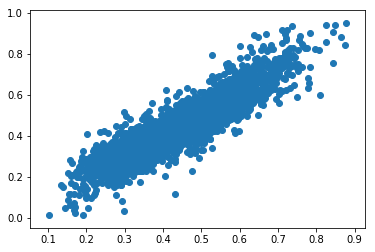

explained variance score:  0.8339180757009


In [58]:
Lin_Reg_Model(house_model,features_train, target_train, features_test, target_test)
